In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential, Model
from keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Flatten, Dense, Dropout, SeparableConv2D

In [43]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [44]:
# Concatenate training and test sets for analysis
x_all = np.concatenate((x_train, x_test), axis=0)
y_all = np.concatenate((y_train, y_test), axis=0)

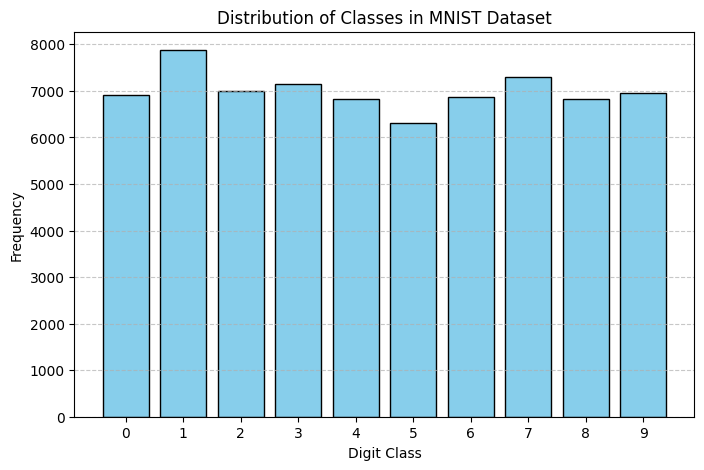

In [45]:
# Plot distribution of classes
plt.figure(figsize=(8, 5))
plt.hist(y_all, bins=np.arange(11)-0.5, rwidth=0.8, color='skyblue', edgecolor='black')
plt.xticks(np.arange(10))
plt.xlabel('Digit Class')
plt.ylabel('Frequency')
plt.title('Distribution of Classes in MNIST Dataset')
plt.savefig('data_distribution.png')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [46]:
# Display dataset properties
print("Total number of images:", len(x_all))
print("Image shape:", x_all[0].shape)
print("Number of unique classes:", len(np.unique(y_all)))

Total number of images: 70000
Image shape: (28, 28)
Number of unique classes: 10


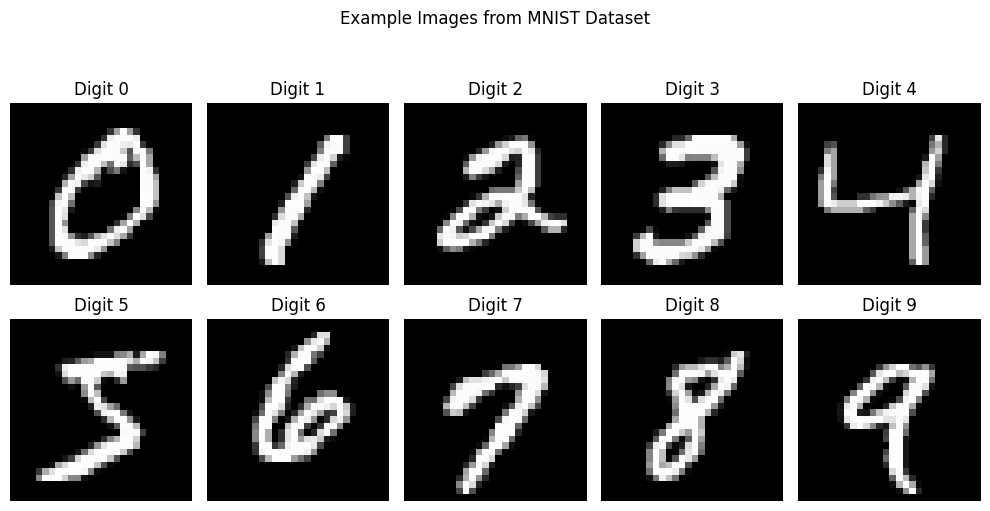

In [47]:
# Display example images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_all[y_all == i][0], cmap='gray')
    plt.title(f'Digit {i}')
    plt.axis('off')
plt.suptitle('Example Images from MNIST Dataset', y=1.05)
plt.savefig('mnist_images.png')
plt.tight_layout()
plt.show()

In [48]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape and normalize images
X_train = X_train.reshape((-1, 28, 28, 1)) / 255.0
X_test = X_test.reshape((-1, 28, 28, 1)) / 255.0

In [49]:
print('Train images shape: ',X_train.shape)
print('Train labels shape: ',y_train.shape)
print('Test images shape: ',X_test.shape)
print('Test images shape: ',y_test.shape)

Train images shape:  (60000, 28, 28, 1)
Train labels shape:  (60000,)
Test images shape:  (10000, 28, 28, 1)
Test images shape:  (10000,)


In [50]:
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)
print("Training labels shape:", y_train.shape)
print("Test labels shape:", y_test.shape)

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)
Training labels shape: (60000,)
Test labels shape: (10000,)


In [51]:
def add_noise_to_mnist(images, noise_level):
    """
    Add Gaussian noise with specified variance (noise_level) to the MNIST images.

    Parameters:
        images (numpy.ndarray): The MNIST images array.
        noise_level (float): The variance of the Gaussian noise to be added.

    Returns:
        numpy.ndarray: The MNIST images with added noise.
    """
    noisy_images = images + noise_level * np.random.randn(*images.shape)
    noisy_images = np.clip(noisy_images, 0., 1.)
    return noisy_images

In [52]:
# Define noise levels
noise_levels = [0.05, 0.1, 0.175, 0.25, 0.3, 0.5, 0.75]

# List to store CNN models for different noise levels
cnn_models = []

# Define callbacks for early stopping
early_stopping = EarlyStopping(patience=3, restore_best_weights=True)

for noise_level in noise_levels:
    print(f"Training CNN model for noise level: {noise_level}")
    # Add noise to the training data
    X_train_noise = add_noise_to_mnist(X_train, noise_level)

    # Split the noisy data into train and validation sets
    X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_noise, y_train, test_size=0.2, random_state=42)

    # Create CNN model
    cnn_model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])

    # Compile the model
    cnn_model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

    # Train the model with early stopping
    history = cnn_model.fit(X_train_split, y_train_split, epochs=20, validation_data=(X_val_split, y_val_split), callbacks=[early_stopping])

    # Add the model to the list
    cnn_models.append(cnn_model)

Epoch 1/20
1500/1500 [==============================] - 104s 32ms/step - loss: 0.1823 - accuracy: 0.9434 - val_loss: 0.0629 - val_accuracy: 0.9804
Epoch 2/20
1500/1500 [==============================] - 51s 34ms/step - loss: 0.0520 - accuracy: 0.9835 - val_loss: 0.0604 - val_accuracy: 0.9802
Epoch 3/20
1500/1500 [==============================] - 46s 31ms/step - loss: 0.0358 - accuracy: 0.9887 - val_loss: 0.0381 - val_accuracy: 0.9881
Epoch 4/20
1500/1500 [==============================] - 49s 33ms/step - loss: 0.0266 - accuracy: 0.9918 - val_loss: 0.0408 - val_accuracy: 0.9888
Epoch 5/20
1500/1500 [==============================] - 48s 32ms/step - loss: 0.0217 - accuracy: 0.9929 - val_loss: 0.0338 - val_accuracy: 0.9904
Epoch 6/20
1500/1500 [==============================] - 53s 35ms/step - loss: 0.0174 - accuracy: 0.9944 - val_loss: 0.0378 - val_accuracy: 0.9893
Epoch 7/20
1500/1500 [==============================] - 48s 32ms/step - loss: 0.0137 - accuracy: 0.9956 - val_loss: 0.0399 

In [53]:
# Evaluate the models on test data
test_results = []
for cnn_model in cnn_models:
    loss, accuracy = cnn_model.evaluate(X_test, y_test)
    test_results.append({'loss': loss, 'accuracy': accuracy})

313/313 [==============================] - 3s 8ms/step - loss: 0.0811 - accuracy: 0.9775


In [54]:
# Print results
print("Results:")
for noise_level, result in zip(noise_levels, test_results):
    print(f"Noise Level: {noise_level}, Loss: {result['loss']}, Accuracy: {result['accuracy']}")

Results:
Noise Level: 0.05, Loss: 0.03227287903428078, Accuracy: 0.989799976348877
Noise Level: 0.1, Loss: 0.02861572615802288, Accuracy: 0.9916999936103821
Noise Level: 0.175, Loss: 0.0379776768386364, Accuracy: 0.9908999800682068
Noise Level: 0.25, Loss: 0.030048828572034836, Accuracy: 0.9904999732971191
Noise Level: 0.3, Loss: 0.03415508568286896, Accuracy: 0.9887999892234802
Noise Level: 0.5, Loss: 0.04396514967083931, Accuracy: 0.9876000285148621
Noise Level: 0.75, Loss: 0.08108127117156982, Accuracy: 0.9775000214576721


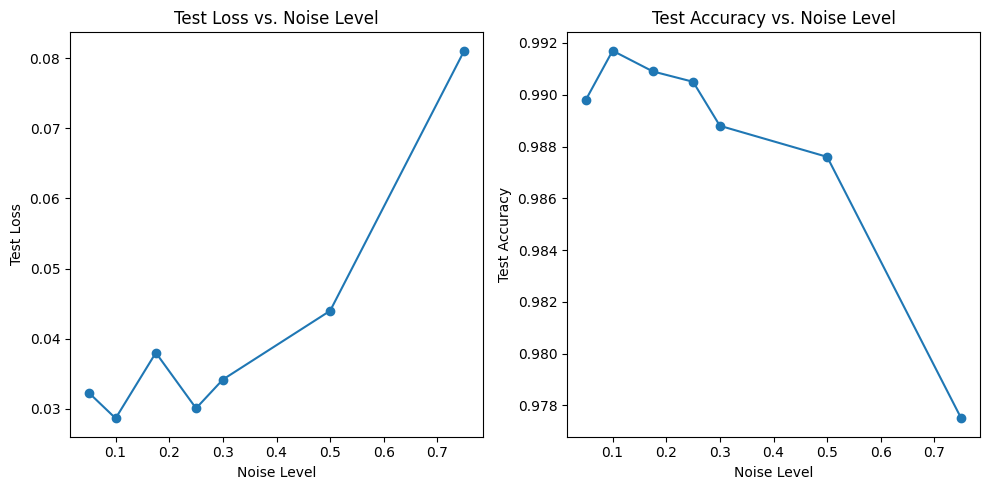

In [55]:
test_losses = []
test_accuracies = []

for result in test_results:
    test_losses.append(result['loss'])
    test_accuracies.append(result['accuracy'])

# Plot test loss and accuracy vs. noise level
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(noise_levels, test_losses, marker='o')
plt.title('Test Loss vs. Noise Level')
plt.xlabel('Noise Level')
plt.ylabel('Test Loss')

plt.subplot(1, 2, 2)
plt.plot(noise_levels, test_accuracies, marker='o')
plt.title('Test Accuracy vs. Noise Level')
plt.xlabel('Noise Level')
plt.ylabel('Test Accuracy')

plt.tight_layout()
plt.show()

In [61]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

train_images_flat = x_train.reshape((len(x_train), 28*28))
test_images_flat = x_test.reshape((len(x_test), 28*28))

In [62]:
def denoising_autoencoder():
    input_layer = Input(shape=(28*28,))
    encoded = Dense(128, activation='relu')(input_layer)
    decoded = Dense(28*28, activation='sigmoid')(encoded)

    autoencoder = Model(input_layer, decoded)
    autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy')
    return autoencoder

In [63]:
dae_models = []
histories = []

def add_noise(images, noise_factor=0.5):
    noisy_images = images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=images.shape)
    noisy_images = np.clip(noisy_images, 0., 1.)
    return noisy_images

for noise_level in noise_levels:
    print(f"Training denoising autoencoder for noise level: {noise_level}")
    noisy_train_images = add_noise(train_images_flat, noise_factor=noise_level)

    autoencoder = denoising_autoencoder()

    history = autoencoder.fit(noisy_train_images, train_images_flat,
                              epochs=20, batch_size=256, validation_split=0.1)

    dae_models.append(autoencoder)
    histories.append(history)

Training denoising autoencoder for noise level: 0.05
Epoch 1/20
211/211 [==============================] - 4s 14ms/step - loss: 0.2219 - val_loss: 0.1393
Epoch 2/20
211/211 [==============================] - 4s 19ms/step - loss: 0.1187 - val_loss: 0.1038
Epoch 3/20
211/211 [==============================] - 3s 13ms/step - loss: 0.0961 - val_loss: 0.0905
Epoch 4/20
211/211 [==============================] - 3s 15ms/step - loss: 0.0867 - val_loss: 0.0844
Epoch 5/20
211/211 [==============================] - 3s 14ms/step - loss: 0.0818 - val_loss: 0.0805
Epoch 6/20
211/211 [==============================] - 4s 19ms/step - loss: 0.0786 - val_loss: 0.0780
Epoch 7/20
211/211 [==============================] - 3s 14ms/step - loss: 0.0763 - val_loss: 0.0760
Epoch 8/20
211/211 [==============================] - 3s 13ms/step - loss: 0.0747 - val_loss: 0.0747
Epoch 9/20
211/211 [==============================] - 3s 14ms/step - loss: 0.0734 - val_loss: 0.0735
Epoch 10/20
211/211 [=================

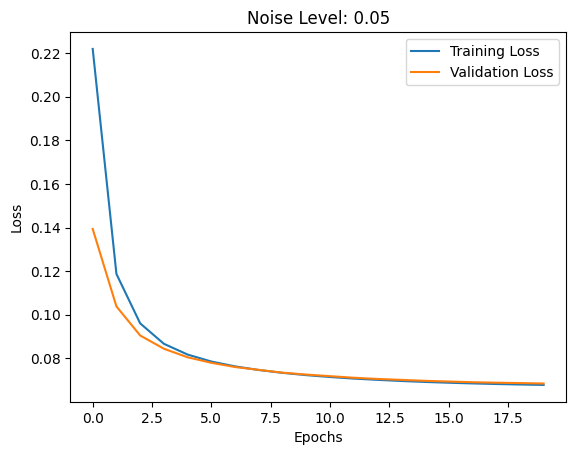

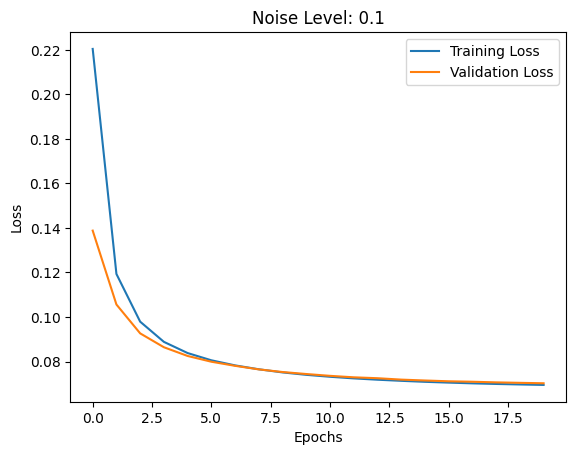

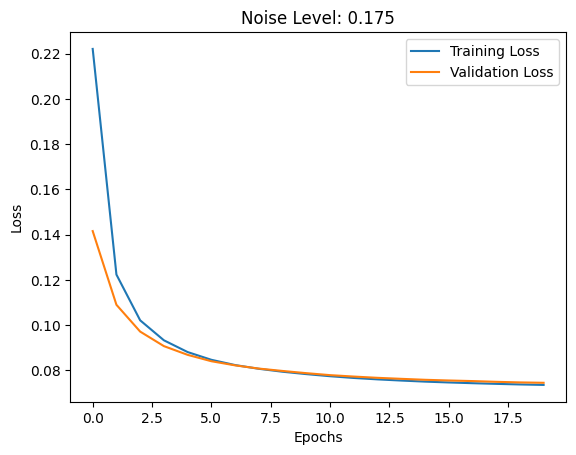

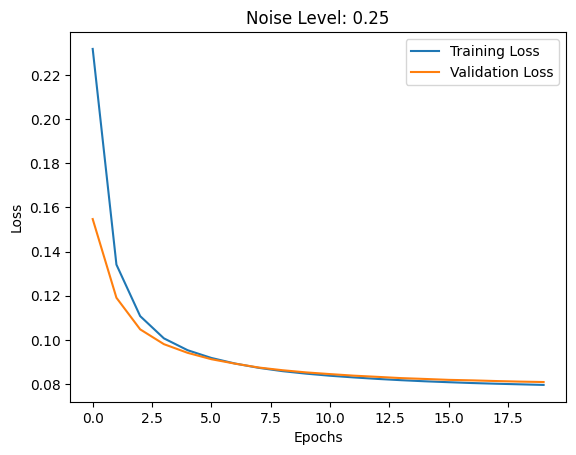

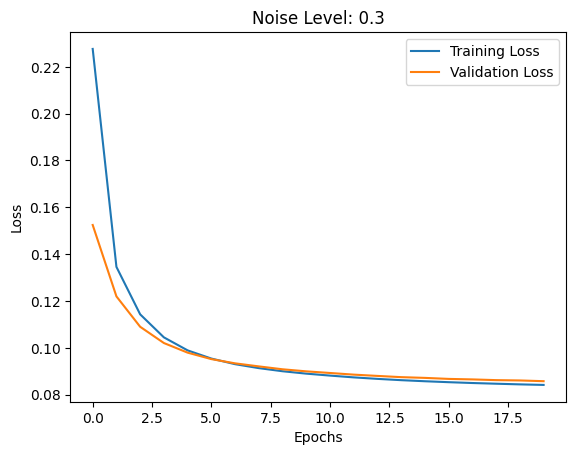

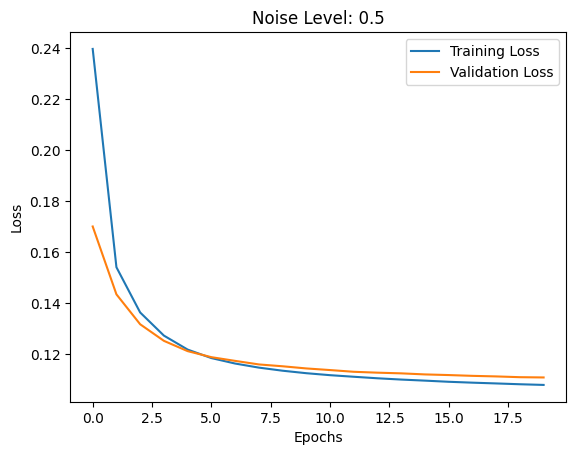

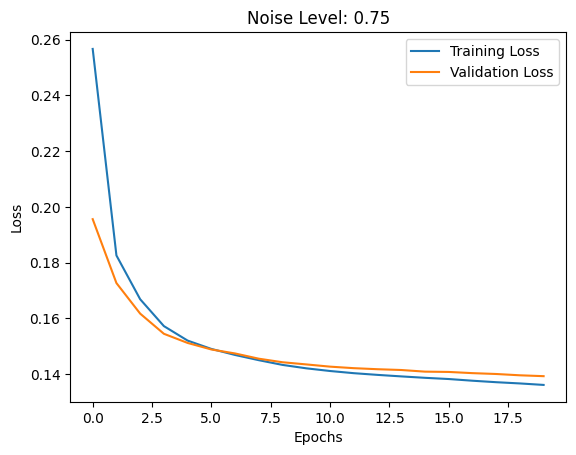

In [64]:
# Plotting the training and validation losses
for i, history in enumerate(histories):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Noise Level: {noise_levels[i]}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

313/313 [==============================] - 1s 2ms/step


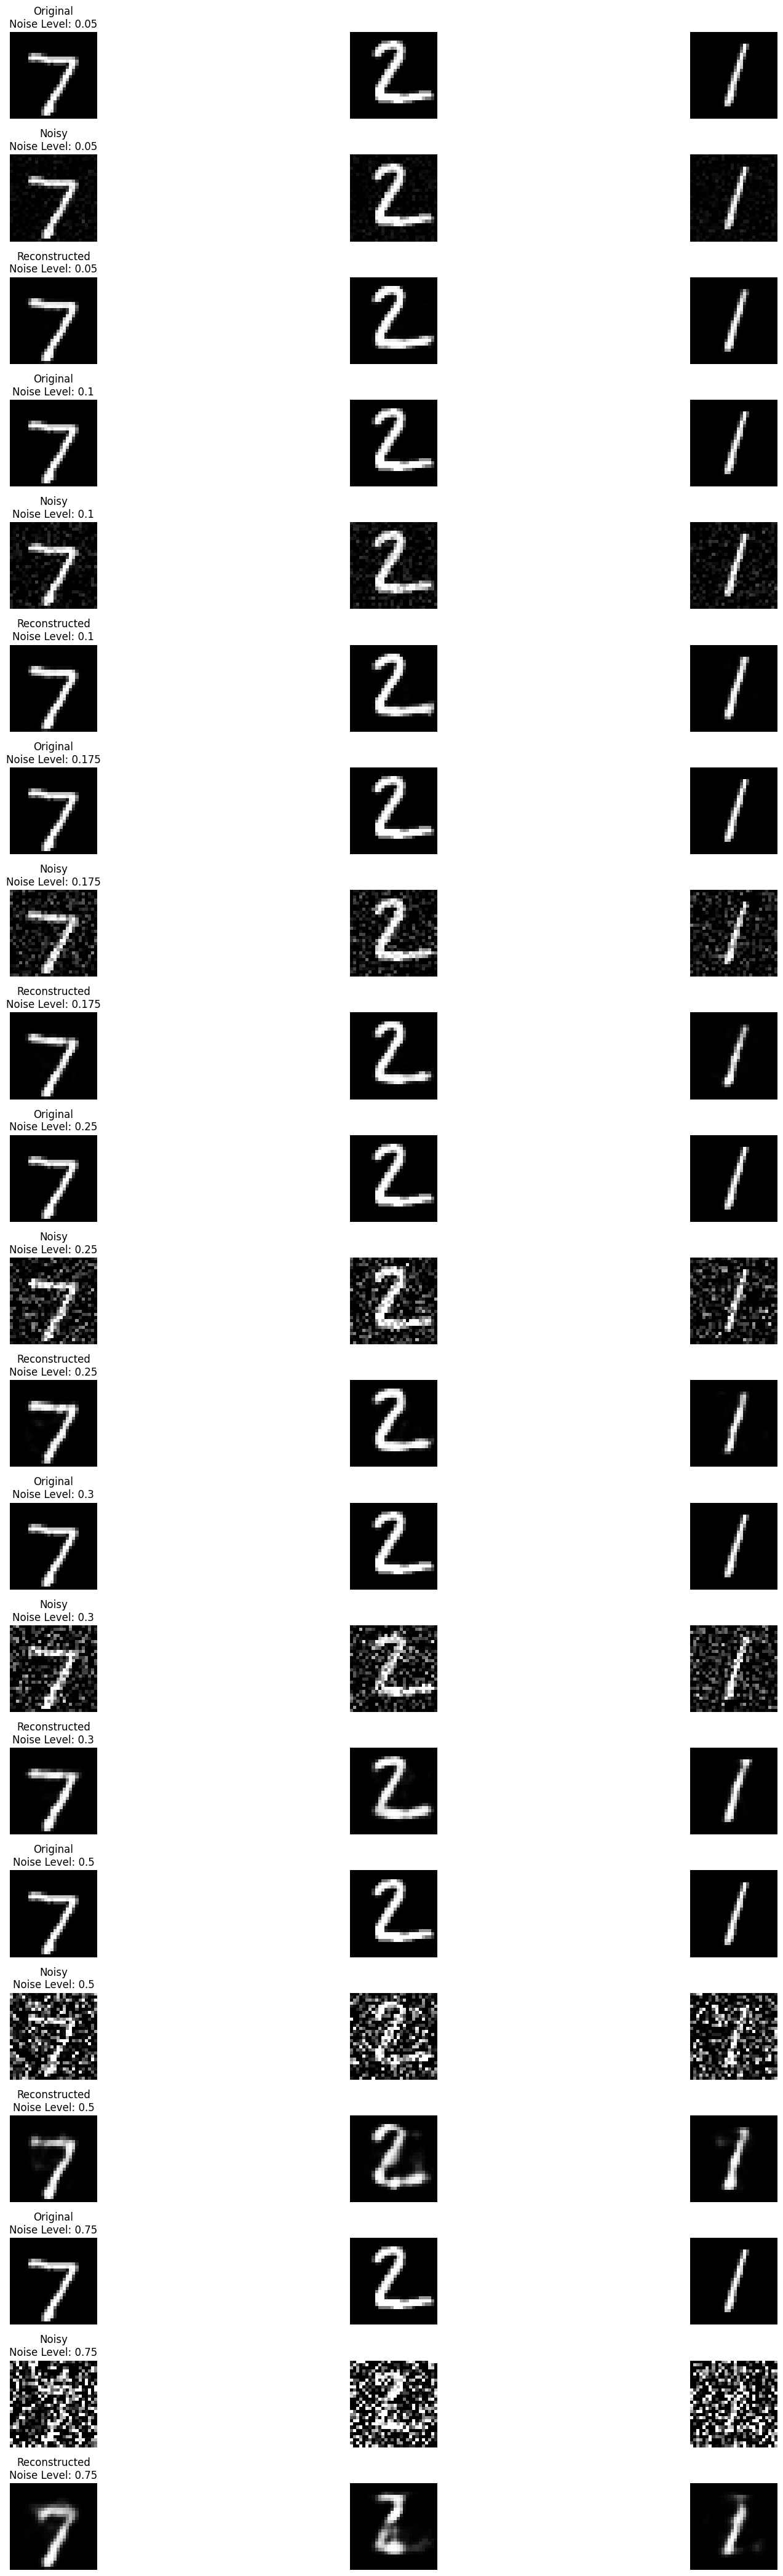

In [65]:
def display_comparison(models, noise_levels, test_images, n_images=10):
    num_levels = len(models)
    plt.figure(figsize=(20, 6 * num_levels))  # Adjust size to accommodate titles and more rows

    for idx, (model, noise_level) in enumerate(zip(models, noise_levels)):
        # Add noise to the test data
        noisy_images = add_noise(test_images.reshape(-1, 28, 28), noise_level)  # Ensure input is in 28x28 format for noise addition
        # Flatten the noisy images for prediction
        noisy_images_flat = noisy_images.reshape(noisy_images.shape[0], -1)
        # Predict the reconstructed images from the noisy data
        reconstructed_images = model.predict(noisy_images_flat)

        for i in range(n_images):
            # Original Image
            ax = plt.subplot(num_levels * 3, n_images, i + 1 + (idx * 3 * n_images))
            plt.imshow(test_images[i].reshape(28, 28), cmap='gray')  # Reshape flat images to 28x28 for display
            if i == 0:
                plt.title(f"Original\nNoise Level: {noise_level}")
            plt.axis('off')

            # Noisy Image
            ax = plt.subplot(num_levels * 3, n_images, i + 1 + n_images + (idx * 3 * n_images))
            plt.imshow(noisy_images[i].reshape(28, 28), cmap='gray')  # Reshape flat noisy images to 28x28 for display
            if i == 0:
                plt.title(f"Noisy\nNoise Level: {noise_level}")
            plt.axis('off')

            # Reconstructed Image
            ax = plt.subplot(num_levels * 3, n_images, i + 1 + 2 * n_images + (idx * 3 * n_images))
            plt.imshow(reconstructed_images[i].reshape(28, 28), cmap='gray')  # Reshape flat predictions to 28x28 for display
            if i == 0:
                plt.title(f"Reconstructed\nNoise Level: {noise_level}")
            plt.axis('off')

    plt.tight_layout()
    plt.show()

# Example call (ensure to replace `dae_models`, `noise_levels`, `test_images_flat` with your actual variables)
display_comparison(dae_models, noise_levels, test_images_flat, n_images=3)
